### Figure 1 supplementary

In [28]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])
    
import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
from neuropy import plotting
from neuropy.utils.misc import flatten
from scipy import stats
from plotters import Plotter, get_nsd_vs_sd_df, get_nsd_vs_sd_df_by_state, stats_to_df, filter_stats_df, add_parametric_extras
from stats_utils import get_bootstrap_prob, get_bootstrap_prob_paired
from pandas.api.types import CategoricalDtype

grpdata = subjects.GroupData()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### EDF1: All animal POST hypnograms
See `sd_figure3.ipynb`.

### EDF 2A: Slow oscillation hypnograms (3 animals, 1 hour during POST only)
See `sd_slow_oscillation.ipynb`

### EDF 2B: Brain state propotion breakdown
See `st_brainstates.ipynb` "Plot state proportions" tab

### EDF 2F-G: Ripple-Delta Probability
See `sd_delta_wave.ipynb` "Delta-ripple probability psth across 2.5 hour block" block

### EDF 2D: Ripple rate trend in first 5h of POST

NSD Wilcoxon two-tailed p-value = 0.0
NSD pboot (two-tailed) = 0.0
SD Wilcoxon two-tailed p-value = 1.3752134304049452e-131
SD pboot (two-tailed) = 0.7916


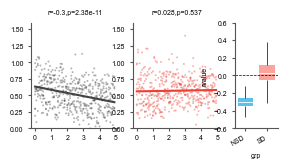

In [2]:
rpl_rate = subjects.GroupData().ripple_rate_post5h_trend
trend_df = subjects.GroupData().ripple_rate_post5h_trend_bootstrap

fig = subjects.SdFig().fig1_supp()
subfig = fig.add_subfigure(fig.gs[1, :3])
axs = subfig.subplots(1, 3, width_ratios=[2, 2, 1])

for g, grp in enumerate(["NSD", "SD"]):
    df = rpl_rate[rpl_rate.grp == grp]
    color = subjects.colors_sd(1)[g]
    x = df["zt"].values.astype(float)
    y = df["ripple_rate"].values
    linfit = stats.linregress(x, y)
    m = linfit.slope
    r = linfit.rvalue
    c = linfit.intercept
    pvalue = linfit.pvalue
    ax = axs[g]
    ax.scatter(x, y, s=2, c=color, alpha=0.4, rasterized=True, edgecolors="none")
    ax.plot(x, m * x + c, color=color)
    # ax.set_title(f"r={np.round(r,2)},p={np.round(pvalue,3)}")
    ax.set_title(f"r={r:.2g},p={pvalue:.3g}")
    ax.set_ylim(0, 1.6)
    ax.set_xticks(np.arange(6))

ax = axs[2]
p1 = Plotter(data=trend_df, x="grp", y="rvalue")
p1.boxplot_sd()
ax.axhline(0, color="k", lw=0.5, ls="--")

fig.savefig(subjects.figpath_sd / "ripple_rate_trend_bootstrap", format="svg", dpi=300)

for grp in ["NSD", "SD"]:
    df_use = trend_df[trend_df.grp == grp]
    # Standard stats
    result = stats.wilcoxon(df_use.rvalue)
    print(f"{grp} Wilcoxon two-tailed p-value = {result.pvalue}")

    # Boostrap pboot
    p = (df_use.rvalue < 0).sum()/df_use.shape[0]
    p = p * 2 if p < 0.5 else  (1 - p) * 2
    print(f"{grp} pboot (two-tailed) = {p}")
    

### EDF 2E: Ripple rate statewise

/tmp/ipykernel_1913476/3534495938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)
/tmp/ipykernel_1913476/3534495938.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)



NREM NSD stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

PRE vs. ZT 0-2.5: Welch's t-test independent samples, P_val:9.922e-01 t=-1.011e-02
PRE vs. ZT 2.5-5: Welch's t-test independent samples, P_val:2.509e-01 t=1.241e+00
PRE vs. ZT 5-7.5: Welch's t-test independent samples, P_val:5.954e-02 t=2.191e+00
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

ZT 0-2.5 vs. ZT 2.5-5: t-test paired samples, P_val:1.657e-01 t=1.547e+00
ZT 2.5-5 vs. ZT 5-7.5: t-test paired samples, P_val:1.913e-01 t=1.446e+00
ZT 0-2.5 vs. ZT 5-7.5: t-test paired samples, P_val:2.923e-02 t=2.733e+00


/tmp/ipykernel_1913476/3534495938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)
/tmp/ipykernel_1913476/3534495938.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)



WK NSD stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

PRE vs. ZT 0-2.5: t-test paired samples, P_val:2.080e-01 t=-1.387e+00
ZT 0-2.5 vs. ZT 2.5-5: t-test paired samples, P_val:1.330e-04 t=7.538e+00
ZT 2.5-5 vs. ZT 5-7.5: t-test paired samples, P_val:6.761e-01 t=-4.358e-01
PRE vs. ZT 2.5-5: t-test paired samples, P_val:3.324e-02 t=2.644e+00
ZT 0-2.5 vs. ZT 5-7.5: t-test paired samples, P_val:1.351e-03 t=5.132e+00
PRE vs. ZT 5-7.5: t-test paired samples, P_val:4.417e-02 t=2.449e+00


/tmp/ipykernel_1913476/3534495938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)
/tmp/ipykernel_1913476/3534495938.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)



NREM SD stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

PRE vs. ZT 2.5-5: Welch's t-test independent samples, P_val:4.650e-02 t=-3.781e+00
ZT 2.5-5 vs. ZT 5-7.5: Welch's t-test independent samples, P_val:1.186e-04 t=6.950e+00
PRE vs. ZT 5-7.5: Welch's t-test independent samples, P_val:8.496e-02 t=2.084e+00


/tmp/ipykernel_1913476/3534495938.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)
/tmp/ipykernel_1913476/3534495938.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)



WK SD stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

PRE vs. ZT 0-2.5: t-test paired samples, P_val:4.841e-01 t=-7.388e-01
ZT 0-2.5 vs. ZT 2.5-5: t-test paired samples, P_val:8.351e-01 t=-2.160e-01
ZT 2.5-5 vs. ZT 5-7.5: t-test paired samples, P_val:1.555e-02 t=3.177e+00
PRE vs. ZT 2.5-5: t-test paired samples, P_val:9.238e-02 t=-1.948e+00
ZT 0-2.5 vs. ZT 5-7.5: t-test paired samples, P_val:2.051e-01 t=1.397e+00
PRE vs. ZT 5-7.5: t-test paired samples, P_val:6.793e-01 t=4.312e-01
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

ZT 2.5-5_NSD vs. ZT 2.5-5_SD: Welch's t-test independent samples, P_val:2.677e-05 t=-6.397e+00
ZT 0-2.5 vs 5-7.5_NSD vs. ZT 0-2.5 vs 5-7.5_SD: Welch's t-test independent 

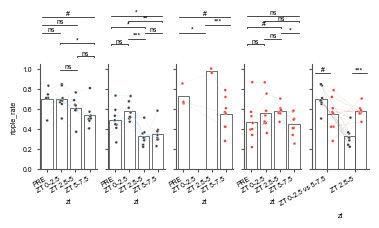

In [34]:
fig = subjects.SdFig().fig1_supp()
rpl_rate = grpdata.ripple_rate_statewise_blocks
rpl_rate = rpl_rate[rpl_rate.zt != "MAZE"]

subfig = fig.add_subfigure(fig.gs[2, 2:6])
axs = subfig.subplots(1, 5, sharey=True)

# order = ["PRE", "0-2.5", "2.5-5", "5-7.5"]
zt_order = CategoricalDtype(["PRE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"], ordered=True)

results_list = []
for g, grp in enumerate(["NSD", "SD"]):
    for st, state in enumerate(["NREM", "WK"]):
        color = [subjects.colors_sd(1)[g]]
        ax = axs[2 * g + st]
        df = rpl_rate[(rpl_rate.grp == grp) & (rpl_rate.brainstate == state)]
        df.loc[:, "zt"] = df.loc[:, "zt"].astype(zt_order)
        df = df.sort_values(by="zt")

        p = Plotter(
            data=df,
            x="zt",
            y="ripple_rate",
            ax=ax,
        )
        p.stripbarlineplot_sd(palette=color)

        print(f"\n\033[4m{state} {grp} stats\033[0m:")
        if state == "WK":
            results_list.append(p.stat_anot(
                stat_within="t-test_paired",
                alpha_within=[0.05, 0.01, 0.001],
                fontsize=5,
                verbose=True,
                prepend=(grp, state),
            ))

        if state == "NREM":
            results_list.append(p.stat_anot(
                stat_within="t-test_paired",
                alpha_within=[0.05, 0.01, 0.001],
                stat_unequal="t-test_welch",
                fontsize=5,
                verbose=True,
                prepend=(grp, state),
            ))

        # fig.adjust_yticks(ax)

ax = axs[4]
df_bw = get_nsd_vs_sd_df_by_state(rpl_rate)
p2 = Plotter(data=df_bw, x="zt", y="ripple_rate", hue="grp", ax=ax)
p2.stripbarlineplot_sd(palette=subjects.colors_sd(1))
results_list.append(p2.stat_anot_sd(
    stat_across="t-test_welch",
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
    prepend=(grp, state),
    
))

fig.savefig(subjects.figpath_sd / "ripple_rate_statewise", format="svg")

In [102]:
import pingouin as pg
results_df = stats_to_df(results_list, prepend=("grp", "state"))
results_df.loc[(results_df.comp1 == "ZT 0-2.5 vs 5-7.5_NSD") & (results_df.comp2 == "ZT 0-2.5 vs 5-7.5_SD"), "state"] = "NREM"  # Fix state which is not accurate above.
results_df = add_parametric_extras(rpl_rate, results_df, "ripple_rate")
# results_df
results_df = pd.concat((results_df[:-1], pg.ttest(rpl_rate[(rpl_rate.grp == "NSD") & (rpl_rate.zt == "ZT 0-2.5") & (rpl_rate.brainstate == "NREM")]["ripple_rate"],
                               rpl_rate[(rpl_rate.grp == "SD") & (rpl_rate.zt == "ZT 5-7.5") & (rpl_rate.brainstate == "NREM")]["ripple_rate"],
                               paired=False, correction=True).reset_index()), axis=0)
results_df.to_csv("/home/nkinsky/Documents/sleep_deprivation/ProcessedData/ripple_rate_by_state_stats.csv")
results_df

error calculating stats for index=22. Do by hand!
Index(['ripple_rate', 'brainstate', 'zt', 'session', 'grp'], dtype='object')
test-statistics are off by more than merge_thresh - returning pingouin values - compare to results_df_in and re-run


,grp,state,comp1,comp2,index,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,0
0,NSD,NREM,PRE,ZT 0-2.5,T-test,-1.283714,27.000000,two-sided,0.210150,"[-0.17, 0.04]",0.479331,0.646,0.235946,NaN
1,NSD,NREM,PRE,ZT 2.5-5,T-test,1.565730,27.000000,two-sided,0.129058,"[-0.03, 0.23]",0.584634,0.864,0.326693,NaN
2,NSD,NREM,PRE,ZT 5-7.5,T-test,2.105055,27.000000,two-sided,0.044730,"[0.0, 0.24]",0.786015,1.732,0.527912,NaN
3,NSD,NREM,ZT 0-2.5,ZT 2.5-5,T-test,5.019632,15.000000,two-sided,0.000152,"[0.1, 0.24]",1.124768,196.712,0.987320,NaN
4,NSD,NREM,ZT 2.5-5,ZT 5-7.5,T-test,0.624272,15.000000,two-sided,0.541828,"[-0.05, 0.09]",0.131481,0.303,0.078284,NaN
5,NSD,NREM,ZT 0-2.5,ZT 5-7.5,T-test,7.541655,15.000000,two-sided,0.000002,"[0.13, 0.24]",1.439543,1.054e+04,0.999664,NaN
6,NSD,WK,PRE,ZT 0-2.5,T-test,-1.283714,27.000000,two-sided,0.210150,"[-0.17, 0.04]",0.479331,0.646,0.235946,NaN
7,NSD,WK,ZT 0-2.5,ZT 2.5-5,T-test,5.019632,15.000000,two-sided,0.000152,"[0.1, 0.24]",1.124768,196.712,0.987320,NaN
8,NSD,WK,ZT 2.5-5,ZT 5-7.5,T-test,0.624272,15.000000,two-sided,0.541828,"[-0.05, 0.09]",0.131481,0.303,0.078284,NaN
9,NSD,WK,PRE,ZT 2.5-5,T-test,1.565730,27.000000,two-sided,0.129058,"[-0.03, 0.23]",0.584634,0.864,0.326693,NaN


### EDF 2H: OFF period - ripple modulation
See `sd_off_periods.ipynb`

### EDF 2I-J: Interruption effects on delta and ripples
See `sd_handling.ipynb` for all plots 

### EDF 2K: Ripple properties statewise


peak_freq NSD NREM stats:

peak_freq NSD WK stats:

peak_freq SD NREM stats:

peak_freq SD WK stats:

sw_amp NSD NREM stats:

sw_amp NSD WK stats:

sw_amp SD NREM stats:

sw_amp SD WK stats:

ripple_power NSD NREM stats:

ripple_power NSD WK stats:

ripple_power SD NREM stats:

ripple_power SD WK stats:


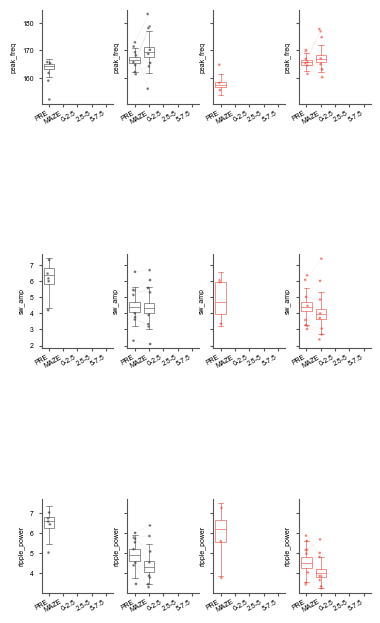

In [104]:
rpl_sess = subjects.GroupData().ripple_features_brainstate
rpl_sess_mean = (
    rpl_sess.groupby(["grp", "zt", "session", "brainstate"], sort=False)
    .mean(numeric_only=True)
    .reset_index()
)
rpl_sess_mean = rpl_sess_mean[
    ~(
        (rpl_sess_mean.grp == "SD")
        & (rpl_sess_mean.zt == "2.5-5")
        & (rpl_sess_mean.brainstate == "NREM")
    )
]

df1 = grpdata.ripple_NREM_bootstrap_session_ripples
df1 = df1[~((df1.grp == "SD") & (df1.zt == "2.5-5"))]
# df1["state"] = df1["grp"] + "-NREM"
df1["state"] = "NREM"

df2 = grpdata.ripple_WK_bootstrap_session_ripples
# df2["state"] = df2["grp"] + "-WK"
df2["state"] = "WK"

rpl_state = pd.concat([df1, df2])


fig = subjects.SdFig().fig1()

y_labels = [
    "Ripple frequency (Hz)",
    "Sharp wave amplitude",
    "Ripple power (zscore)",
]

zt_order = ["PRE", "MAZE", "0-2.5", "2.5-5", "5-7.5"]
# zt_order = CategoricalDtype(["PRE", "0-2.5", "2.5-5", "5-7.5"], ordered=True)

palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
results_list = []
for d, param in enumerate(["peak_freq", "sw_amp", "ripple_power"]):
    subfig = fig.add_subfigure(fig.gs[2 * d + 1, :6])
    axs = subfig.subplots(1, 4, sharey=True)
    # ax = fig.subplot(fig.gs[d, :4])
    # ax.grid(axis="y", lw=0.5, alpha=0.5)
    for g, grp in enumerate(["NSD", "SD"]):
        for st, state in enumerate(["NREM", "WK"]):
            ax = axs[2 * g + st]
            df = rpl_state[(rpl_state.grp == grp) & (rpl_state.state == state)].copy()
            # df["zt"] = df["zt"].astype(zt_order).values
            # df["zt"] = pd.Categorical(df["zt"], categories=zt_order)
            # df.sort_values(by="zt", inplace=True)

            mean_df = rpl_sess_mean[
                (rpl_sess_mean.grp == grp) & (rpl_sess_mean.brainstate == state)
            ].copy()
            mean_df["zt"] = pd.Categorical(mean_df["zt"], categories=zt_order)
            mean_df.sort_values(by="zt", inplace=True)

            palette = [subjects.colors_sd()[g]]
            p1 = Plotter(data=df, x="zt", y=param, ax=ax)
            p1.boxplot_sd2(palette=palette, order=zt_order)

            p2 = Plotter(data=mean_df, x="zt", y=param, ax=ax)
            p2.striplineplot_sd(palette=[palette_light[g]], zorder=-3)

            try:
                print(f"\n\033[4m{param} {grp} {state} stats\033[0m:")
                resultst_list.append(p1.stat_anot(
                    stat_within=get_bootstrap_prob_paired,
                    # stat_unequal=get_bootstrap_prob,
                    alpha_within=[0.025, 0.005, 0.0005],
                    fontsize=5,
                    verbose=True,
                ))

            except:
                # p1.stat_anot(
                #     stat_within=get_bootstrap_prob_paired,
                #     stat_unequal=get_bootstrap_prob,
                #     alpha_within=0.025,
                #     fontsize=5,
                # )
                pass
            # fig.adjust_yticks(ax)
            ax.set_xlabel("")

fig.savefig(subjects.figpath_sd / "ripple_properties_statewise", format="svg")

##### Compare ripple properties between:
a) SLEEP SD 5-7.5 and NSD 0-2.5 (1st block of sleep). b) WAKE 2.5-5 SD vs. NSD (0-2.5 also could be an option)


peak_freq NSD NREM stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 2.50e-02 < p <= 1.00e-01
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:7.460e-02 Stat=3.611e+00
ZT 0-2.5 vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=7.233e+00
ZT 2.5-5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:1.200e-03 Stat=2.886e+00
PRE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:3.000e-03 Stat=1.084e+01
ZT 0-2.5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=1.012e+01
PRE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:4.000e-04 Stat=1.373e+01

peak_freq NSD WK stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 2.50e-02 < p <= 1.00e-01
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. MAZE: get_bootstrap_prob_paired, P_val:1.245e-01 Stat=-3.071e+00
MAZE vs. ZT 0-2.5: g

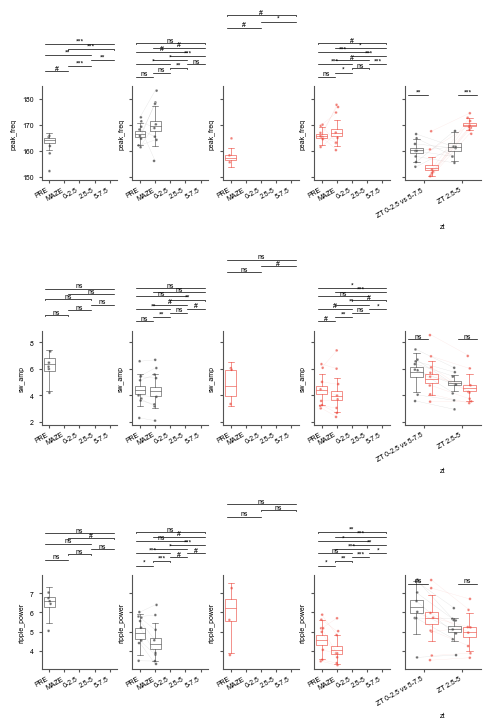

In [106]:
rpl_sess = subjects.GroupData().ripple_features_brainstate
rpl_sess_mean = (
    rpl_sess.groupby(["grp", "zt", "session", "brainstate"], sort=False)
    .mean(numeric_only=True)
    .reset_index()
)
rpl_sess_mean = rpl_sess_mean[
    ~(
        (rpl_sess_mean.grp == "SD")
        & (rpl_sess_mean.zt == "2.5-5")
        & (rpl_sess_mean.brainstate == "NREM")
    )
]

df1 = grpdata.ripple_NREM_bootstrap_session_ripples
df1 = df1[~((df1.grp == "SD") & (df1.zt == "2.5-5"))]
# df1["state"] = df1["grp"] + "-NREM"
df1["state"] = "NREM"

df2 = grpdata.ripple_WK_bootstrap_session_ripples
# df2["state"] = df2["grp"] + "-WK"
df2["state"] = "WK"

rpl_state = pd.concat([df1, df2])


fig = subjects.SdFig().fig1()

y_labels = [
    "Ripple frequency (Hz)",
    "Sharp wave amplitude",
    "Ripple power (zscore)",
]

zt_order = ["PRE", "MAZE", "0-2.5", "2.5-5", "5-7.5"]
# zt_order = CategoricalDtype(["PRE", "0-2.5", "2.5-5", "5-7.5"], ordered=True)

palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
results_list = []
for d, param in enumerate(["peak_freq", "sw_amp", "ripple_power"]):
    subfig = fig.add_subfigure(fig.gs[2 * d + 1, :8])
    axs = subfig.subplots(1, 5, sharey=True)
    # ax = fig.subplot(fig.gs[d, :4])
    # ax.grid(axis="y", lw=0.5, alpha=0.5)
    for g, grp in enumerate(["NSD", "SD"]):
        for st, state in enumerate(["NREM", "WK"]):
            ax = axs[2 * g + st]
            df = rpl_state[(rpl_state.grp == grp) & (rpl_state.state == state)].copy()
            # df["zt"] = df["zt"].astype(zt_order).values
            # df["zt"] = pd.Categorical(df["zt"], categories=zt_order)
            # df.sort_values(by="zt", inplace=True)

            mean_df = rpl_sess_mean[
                (rpl_sess_mean.grp == grp) & (rpl_sess_mean.brainstate == state)
            ].copy()
            mean_df["zt"] = pd.Categorical(mean_df["zt"], categories=zt_order)
            mean_df.sort_values(by="zt", inplace=True)

            palette = [subjects.colors_sd()[g]]
            p1 = Plotter(data=df, x="zt", y=param, ax=ax)
            p1.boxplot_sd2(palette=palette, order=zt_order)

            p2 = Plotter(data=mean_df, x="zt", y=param, ax=ax)
            p2.striplineplot_sd(palette=[palette_light[g]], zorder=-3)

            try:
                print(f"\n\033[4m{param} {grp} {state} stats\033[0m:")
                if (grp == 'SD') & (state == 'NREM'):
                    df_temp = df
                results_list.append(p1.stat_anot(
                    stat_within=get_bootstrap_prob_paired,
                    # stat_unequal=get_bootstrap_prob,
                    alpha_within=[0.025, 0.005, 0.0005],
                    fontsize=5,
                    verbose=True,
                    prepend=(grp, state, param),
                ))
                
            except:
                print('unequal sizes, using unpaired bootstrap')
                results_list.append(p1.stat_anot(
                    stat_within=get_bootstrap_prob_paired,
                    stat_unequal=get_bootstrap_prob,
                    alpha_within=[0.025, 0.005, 0.0005],
                    fontsize=5,
                    verbose=True,
                    prepend=(grp, state, param),
                ))
                # pass
            # fig.adjust_yticks(ax)
            ax.set_xlabel("")

    # Plot NSD vs. SD comparisons
    ax = axs[4]
    df1 = get_nsd_vs_sd_df_by_state(rpl_state)
    df2 = get_nsd_vs_sd_df_by_state(rpl_sess_mean)

    palette = subjects.colors_sd(1)
    palette_light = subjects.colors_sd_light(1)
    print(f"\n\033[4m{param} NSD vs SD stats\033[0m:")
    p1 = Plotter(data=df1, x="zt", y=param, hue="grp", hue_order=["NSD", "SD"], ax=ax)
    results_list.append(p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
        stat_across=get_bootstrap_prob,
        alpha_across=[0.05, 0.01, 0.001],
        fontsize=5,
        verbose=True,
        prepend =(grp, state, param),
    ))
    p2 = Plotter(data=df2, x="zt", y=param, hue="grp", hue_order=["NSD", "SD"], ax=ax)
    p2.striplineplot_sd(palette=palette_light)

    ax.set_ylabel("")

fig.savefig(subjects.figpath_sd / "ripple_properties_statewise", format="svg")

In [110]:
# Get n for each state
rpl_sess.groupby(["brainstate", "grp"]).count()

peak_freq  ripple_power  sw_amp  duration  ripple_power_norm  \
brainstate grp                                                                 
NREM       NSD      67007         67007   67007     67007              67007   
           SD       26798         26798   26798     26798              26798   
WK         NSD      74363         74363   74363     74363              74363   
           SD      128957        128957  128957    128957             128957   

                sw_amp_norm      zt  session  
brainstate grp                                
NREM       NSD        67007   67007    67007  
           SD         26798   26798    26798  
WK         NSD        74363   74363    74363  
           SD        128957  128957   128957

In [27]:
results_df = stats_to_df(results_list, prepend=("grp", "state", "param"))
results_df
filter_stats_df(results_df, figure="EDF2K").head(60)

,grp,state,param,comp1,comp2,test,pval,test_stat
0,NSD,NREM,peak_freq,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",7.460e-02,3.611e+00
1,NSD,NREM,peak_freq,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",0.000e+00,7.233e+00
2,NSD,NREM,peak_freq,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",1.200e-03,2.886e+00
4,NSD,NREM,peak_freq,ZT 0-2.5,ZT 5-7.5,"get_bootstrap_prob_paired,",0.000e+00,1.012e+01
5,NSD,NREM,peak_freq,PRE,ZT 5-7.5,"get_bootstrap_prob_paired,",4.000e-04,1.373e+01
6,NSD,WK,peak_freq,PRE,MAZE,"get_bootstrap_prob_paired,",1.245e-01,-3.071e+00
7,NSD,WK,peak_freq,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",4.132e-01,-5.028e-01
8,NSD,WK,peak_freq,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",9.000e-04,8.569e+00
9,NSD,WK,peak_freq,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",2.468e-01,-2.168e+00
10,NSD,WK,peak_freq,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",8.800e-03,-3.574e+00


### Delta-wave amplitude blocks

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0-2.5_NSD vs. 0-2.5_SD: Welch's t-test independent samples, P_val:3.965e-03 t=3.684e+00
PRE_NSD vs. PRE_SD: Welch's t-test independent samples, P_val:9.652e-01 t=4.445e-02
2.5-5_NSD vs. 2.5-5_SD: Welch's t-test independent samples, P_val:1.021e-01 t=1.752e+00
5-7.5_NSD vs. 5-7.5_SD: Welch's t-test independent samples, P_val:5.775e-03 t=-3.611e+00
0-2.5_NSD vs. 5-7.5_SD: Welch's t-test independent samples, P_val:1.388e-01 t=-1.604e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.5-5_NSD vs. 5-7.5_NSD: t-test paired samples, P_val:3.313e-02 t=2.646e+00
PRE_NSD vs. 0-2.5_NSD: t-test paired samples, P_val:2.007e-03 t=-4.782e+00
0-2.5_NSD vs. 2.5-5_NSD: t-test paired samples, P_val:9.028e-01 t=-1.266e-01
0-2.5_NSD vs. 5-7.5_

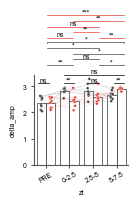

In [6]:
fig = subjects.SdFig().fig1_supp(ncols=6)
delta_df = grpdata.delta_wave_amp_blocks
delta_df = delta_df[delta_df.zt != "MAZE"]
ax = fig.subplot(fig.gs[0])
plotter = Plotter(
    data=delta_df, x="zt", y="delta_amp", hue="grp", hue_order=["NSD", "SD"], ax=ax
)

plotter.stripbarlineplot_sd(palette=subjects.colors_sd(1)).stat_anot_sd(
    stat_across="t-test_welch",
    stat_within="t-test_paired",
    alpha_within=[0.05, 0.01, 0.001],
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
)

fig.savefig(subjects.figpath_sd / "delta_amp_blocks", format="svg")

### EDF 2C: OFF-periods rate

p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

ZT 0-2.5_NSD vs. ZT 0-2.5_SD: Welch's t-test independent samples, P_val:1.192e-04 t=5.609e+00
PRE_NSD vs. PRE_SD: Welch's t-test independent samples, P_val:9.939e-01 t=-7.822e-03
ZT 2.5-5_NSD vs. ZT 2.5-5_SD: Welch's t-test independent samples, P_val:2.166e-03 t=3.754e+00
ZT 5-7.5_NSD vs. ZT 5-7.5_SD: Welch's t-test independent samples, P_val:1.065e-04 t=-5.559e+00
ZT 0-2.5_NSD vs. ZT 5-7.5_SD: Welch's t-test independent samples, P_val:1.336e-01 t=-1.593e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       #: 5.00e-02 < p <= 5.00e-02
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

ZT 2.5-5_NSD vs. ZT 5-7.5_NSD: t-test paired samples, P_val:3.158e-02 t=2.679e+00
PRE_NSD vs. ZT 0-2.5_NSD: t-test paired samples, P_val:4.946e-03 t=-4.0

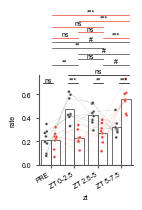

In [29]:
fig = subjects.SdFig().fig1_supp(ncols=6)
off_rate = grpdata.off_rate
off_rate = off_rate[off_rate.zt != "MAZE"]
ax = fig.subplot(fig.gs[0])
plotter = Plotter(
    data=off_rate, x="zt", y="rate", hue="grp", hue_order=["NSD", "SD"], ax=ax
)

results_list = []
results_list.append(
    plotter.stripbarlineplot_sd(palette=subjects.colors_sd(1)).stat_anot_sd(
    stat_across="t-test_welch",
    stat_within="t-test_paired",
    alpha_within=[0.05, 0.01, 0.001],
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
))

fig.savefig(subjects.figpath_sd / "off_rate", format="svg")

In [33]:
results_df = stats_to_df(results_list)
results_df = add_parametric_extras(off_rate, results_df, "rate")
# results_df = filter_stats_df(results_df)
results_df.to_csv("/home/nkinsky/Documents/sleep_deprivation/ProcessedData/off_rate_stats.csv")
results_df

,comp1,comp2,test,pval,test_stat,CI95%,Cohen's-d,dof
0,ZT 0-2.5_NSD,ZT 0-2.5_SD,Welch's,1.192e-04,5.609e+00,"[0.15, 0.34]",2.804413,11.872869
1,PRE_NSD,PRE_SD,Welch's,9.939e-01,-7.822e-03,"[-0.09, 0.09]",0.003911,13.626783
2,ZT 2.5-5_NSD,ZT 2.5-5_SD,Welch's,2.166e-03,3.754e+00,"[0.07, 0.25]",1.876960,13.881876
3,ZT 5-7.5_NSD,ZT 5-7.5_SD,Welch's,1.065e-04,-5.559e+00,"[-0.33, -0.14]",2.779698,12.504745
4,ZT 0-2.5_NSD,ZT 5-7.5_SD,Welch's,1.336e-01,-1.593e+00,"[-0.19, 0.03]",0.796384,13.952773
5,ZT 2.5-5_NSD,ZT 5-7.5_NSD,t-test,3.158e-02,2.679e+00,"[0.01, 0.2]",1.417011,7.000000
6,PRE_NSD,ZT 0-2.5_NSD,t-test,4.946e-03,-4.038e+00,"[-0.42, -0.11]",2.646821,7.000000
7,ZT 0-2.5_NSD,ZT 2.5-5_NSD,t-test,1.922e-01,1.443e+00,"[-0.03, 0.13]",0.545231,7.000000
8,ZT 0-2.5_NSD,ZT 5-7.5_NSD,t-test,2.040e-02,2.984e+00,"[0.03, 0.28]",1.756176,7.000000
9,PRE_NSD,ZT 2.5-5_NSD,t-test,5.096e-03,-4.014e+00,"[-0.34, -0.09]",2.450670,7.000000


### OFF-periods mean duration

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0-2.5_NSD vs. 0-2.5_SD: Welch's t-test independent samples, P_val:1.753e-01 t=1.439e+00
PRE_NSD vs. PRE_SD: Welch's t-test independent samples, P_val:2.335e-01 t=-1.247e+00
2.5-5_NSD vs. 2.5-5_SD: Welch's t-test independent samples, P_val:2.305e-02 t=2.654e+00
5-7.5_NSD vs. 5-7.5_SD: Welch's t-test independent samples, P_val:5.452e-02 t=-2.101e+00
0-2.5_NSD vs. 5-7.5_SD: Welch's t-test independent samples, P_val:8.541e-04 t=-4.234e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.5-5_NSD vs. 5-7.5_NSD: t-test paired samples, P_val:1.706e-01 t=-1.527e+00
PRE_NSD vs. 0-2.5_NSD: t-test paired samples, P_val:6.873e-02 t=-2.149e+00
0-2.5_NSD vs. 2.5-5_NSD: t-test paired samples, P_val:7.372e-03 t=-3.729e+00
0-2.5_NSD vs. 5-7.

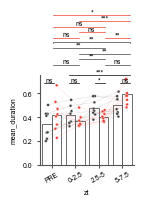

In [8]:
fig = subjects.SdFig().fig1_supp(ncols=6)
off_rate = grpdata.off_mean_duration
off_rate = off_rate[off_rate.zt != "MAZE"]
ax = fig.subplot(fig.gs[0])
plotter = Plotter(
    data=off_rate, x="zt", y="mean_duration", hue="grp", hue_order=["NSD", "SD"], ax=ax
)

plotter.stripbarlineplot_sd(palette=subjects.colors_sd(1)).stat_anot_sd(
    stat_across="t-test_welch",
    stat_within="t-test_paired",
    alpha_within=[0.05, 0.01, 0.001],
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
)
`
fig.savefig(subjects.figpath_sd / "off_mean_duration", format="svg")